#### Importing necessary libraries

In [4]:
import numpy as np
import pandas as pd
from scipy import stats
import json
import seaborn as sns
import matplotlib.pyplot as plt

#### Loading the olist data files

In [2]:
customers = pd.read_csv('olist_customers_dataset.csv')
#geo = pd.read_csv('olist_geolocation_dataset.csv')
item = pd.read_csv('olist_order_items_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
#review = pd.read_csv('olist_order_reviews_dataset.csv')
order = pd.read_csv('olist_orders_dataset.csv')
seller = pd.read_csv('olist_sellers_dataset.csv')
product = pd.read_csv('olist_products_dataset.csv')
translation = pd.read_csv('product_category_name_translation.csv')

In [3]:
customers.head(1)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP


In [5]:
item.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29


In [6]:
payments.head(1)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33


In [7]:
order.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00


In [8]:
seller.head(1)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP


#### Merging files that will be used for project

In [5]:
product_eng = pd.merge(product, translation, on="product_category_name").drop("product_category_name", axis = 1)
product_eng.insert(1, "product_category_name_english", product_eng.pop("product_category_name_english"))

olist = pd.merge(pd.merge(pd.merge(item, payments, on = "order_id"),order, on = "order_id"),product_eng, on = "product_id")
olist = pd.merge(pd.merge(olist, customers, on = "customer_id"), seller, on = "seller_id")
olist.to_csv('olist.csv', index = None)

In [6]:
olist.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,1,credit_card,2,...,28.0,9.0,14.0,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,27277,volta redonda,SP
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,1,boleto,1,...,28.0,9.0,14.0,0fb8e3eab2d3e79d92bb3fffbb97f188,75800,jatai,GO,27277,volta redonda,SP
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,1,credit_card,2,...,28.0,9.0,14.0,3419052c8c6b45daf79c1e426f9e9bcb,30720,belo horizonte,MG,27277,volta redonda,SP
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,1,credit_card,3,...,28.0,9.0,14.0,e7c828d22c0682c1565252deefbe334d,83070,sao jose dos pinhais,PR,27277,volta redonda,SP
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,1,credit_card,4,...,28.0,9.0,14.0,0bb98ba72dcc08e95f9d8cc434e9a2cc,36400,conselheiro lafaiete,MG,27277,volta redonda,SP


In [8]:
olist.isnull().sum()   #checking for null values

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  14
order_delivered_carrier_date     1205
order_delivered_customer_date    2495
order_estimated_delivery_date       0
product_category_name_english       0
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
product_weight_g                    1
product_length_cm                   1
product_height_cm                   1
product_width_cm                    1
customer_uni

#### Replace or drop missing values

In [12]:
olist['order_approved_at'].fillna(olist['order_purchase_timestamp'], inplace=True)
olist['order_delivered_customer_date'].fillna(olist['order_estimated_delivery_date'], inplace=True)
olist['order_delivered_carrier_date'].fillna(olist['order_delivered_customer_date'], inplace=True)

In [13]:
olist.dropna(subset=['product_weight_g','product_length_cm','product_height_cm','product_width_cm'], inplace=True)

In [14]:
olist.isnull().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
product_category_name_english    0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city       

In [9]:
olist.info()         #checking data types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115878 entries, 0 to 115877
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115878 non-null  object 
 1   order_item_id                  115878 non-null  int64  
 2   product_id                     115878 non-null  object 
 3   seller_id                      115878 non-null  object 
 4   shipping_limit_date            115878 non-null  object 
 5   price                          115878 non-null  float64
 6   freight_value                  115878 non-null  float64
 7   payment_sequential             115878 non-null  int64  
 8   payment_type                   115878 non-null  object 
 9   payment_installments           115878 non-null  int64  
 10  payment_value                  115878 non-null  float64
 11  customer_id                    115878 non-null  object 
 12  order_status                  

#### Timestamp values are in object form, changing to datetime format

In [23]:
olist['shipping_limit_date'] = pd.to_datetime(olist['shipping_limit_date'])
olist['order_purchase_timestamp'] = pd.to_datetime(olist['order_purchase_timestamp'])
olist['order_delivered_carrier_date'] = pd.to_datetime(olist['order_delivered_carrier_date'])
olist['order_delivered_customer_date'] = pd.to_datetime(olist['order_delivered_customer_date'])
olist['order_estimated_delivery_date'] = pd.to_datetime(olist['order_estimated_delivery_date'])

In [44]:
olist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115877 entries, 0 to 115877
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115877 non-null  object        
 1   order_item_id                  115877 non-null  int64         
 2   product_id                     115877 non-null  object        
 3   seller_id                      115877 non-null  object        
 4   shipping_limit_date            115877 non-null  datetime64[ns]
 5   price                          115877 non-null  float64       
 6   freight_value                  115877 non-null  float64       
 7   payment_sequential             115877 non-null  int64         
 8   payment_type                   115877 non-null  object        
 9   payment_installments           115877 non-null  int64         
 10  payment_value                  115877 non-null  float64       
 11  

#### Checking Duplicate Data

In [29]:
olist.duplicated().sum()

0

In [46]:
olist.describe()

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,seller_zip_code_prefix
count,115877.000000,115877.000000,115877.000000,115877.000000,115877.000000,115877.000000,115877.000000,115877.000000,115877.000000,115877.000000,115877.000000,115877.000000,115877.000000,115877.000000,115877.000000
mean,1.196320,120.909070,20.075808,1.092831,2.945511,173.001216,48.766019,786.955755,2.207720,2117.594190,30.311554,16.656886,23.110445,35053.151203,24504.318044
std,0.699566,184.140924,15.870955,0.725316,2.779913,268.060699,10.035355,653.074676,1.719525,3785.744297,16.225837,13.480721,11.758209,29813.360198,27625.001509
min,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1003.000000,1001.000000
25%,1.000000,39.900000,13.080000,1.000000,1.000000,61.010000,42.000000,347.000000,1.000000,300.000000,18.000000,8.000000,15.000000,11320.000000,6429.000000
50%,1.000000,74.900000,16.320000,1.000000,2.000000,108.200000,52.000000,601.000000,1.000000,700.000000,25.000000,13.000000,20.000000,24315.000000,13660.000000
75%,1.000000,134.900000,21.220000,1.000000,4.000000,189.720000,57.000000,985.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,58540.000000,28495.000000
max,21.000000,6735.000000,409.680000,29.000000,24.000000,13664.080000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99980.000000,99730.000000


#### Checking correlation of features

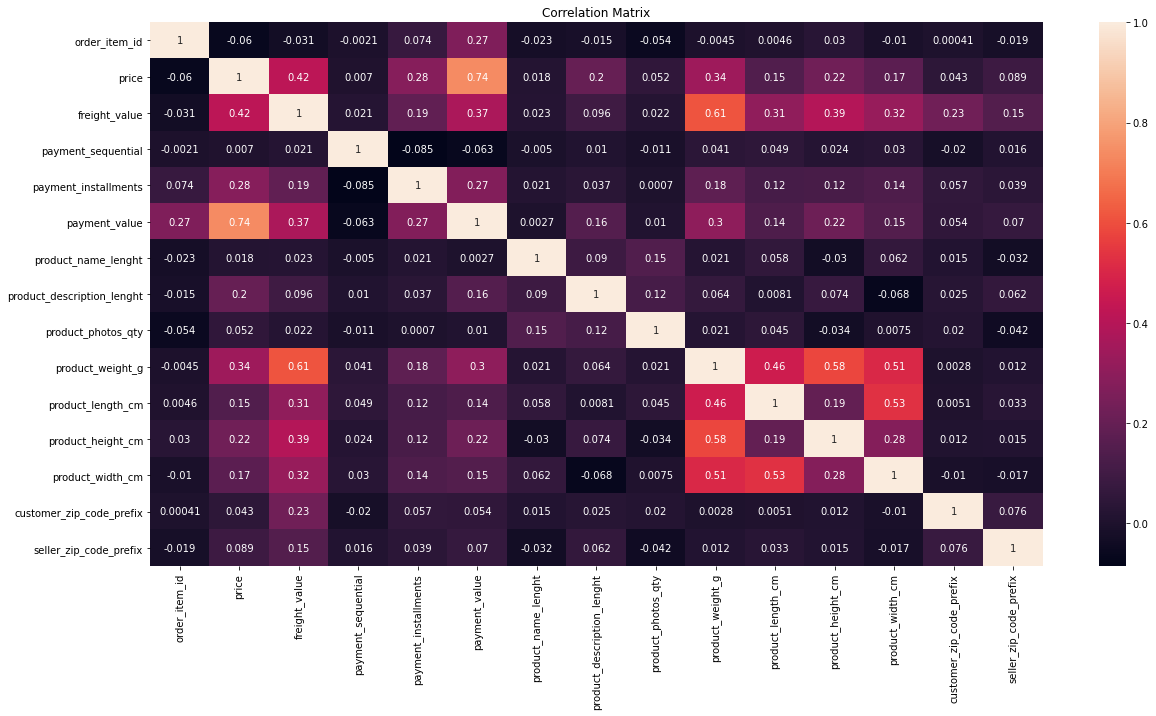

In [41]:
correlation_matrix = olist.corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix')
plt.show()

#### Looking at the correlation matrix, there appears to be strong correlation between (payment value and price), (product weight and freight value),(product width and product weight, product length). This only provides insights for numerical values on the data

### PCA

#### Changing categorical value to numerical values

In [81]:
olist_cat = ['order_status', 'customer_state', 'payment_type'] #categorical data

In [82]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [83]:
olist_num = ['order_item_id', 'price', 'freight_value', 'payment_sequential', 'payment_installments',
             'payment_value']

In [86]:
pipeline = ColumnTransformer([('num', StandardScaler(), olist_num),('cat', OneHotEncoder(), olist_cat)])
olist_change = pipeline.fit_transform(olist)
olist_change.shape

(115877, 44)

In [87]:
olist_change = olist_change.toarray()  #changing to numpy array to perform pca because input cannot be sparse for pca

In [88]:
from sklearn.decomposition import PCA

# Preserving 95% of the variance
pca = PCA(n_components=0.95)
olist_reduced = pca.fit_transform(olist_change)
olist_reduced.shape

(115877, 11)